In [ ]:
pip install lazypredict

In [ ]:

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Import Lazy predict function and parameters
import lazypredict
from lazypredict.Supervised import LazyClassifier

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
#Loading of the Dataset
##Loading of the Employees Attrition dataset
df_attrition = pd.read_csv('HR-Employee-Attrition.csv')


Data Overview
Observations
Sanity checks
- Observing the first 10 rows of the dataset

In [ ]:
df_attrition.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [ ]:
#View the shape of the data
df_attrition.shape

(1470, 35)

The data has 1470 rows and 35 columns

In [ ]:
#View datatypes of the columns and other features
df_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

1. The dataset has got 'Object' and 'int' data types
2. The data doesnt have missing values


In [ ]:
#View data summary for object type only
df_attrition.describe(include='object').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


1. There are 9 columns / fields of object data types
2. Attrition has 2 unique entries only, BusinessTravel has 6 and JobRole has 9

In [ ]:
#We view the unique entries on the object data columns
for col in df_attrition.select_dtypes(include='object').columns:
    print(col)
    print(df_attrition[col].unique())


Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department
['Sales' 'Research & Development' 'Human Resources']
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender
['Female' 'Male']
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus
['Single' 'Married' 'Divorced']
Over18
['Y']
OverTime
['Yes' 'No']


1. Attrition has Yes and No.
2. Gender has Male and Female
3. Job Role has 'Sales Executive', 'Research Scientist', 'Laboratory Technician',
 'Manufacturing Director', 'Healthcare Representative', 'Manager',
 'Sales Representative', 'Research Director', and 'Human Resources'

In [ ]:
#get uique values in the StandardHours column
df_attrition['StandardHours'].unique()

array([80])

In [ ]:
#get unique value on the employee count column
df_attrition['EmployeeCount'].unique()

array([1])

In [ ]:
#get unique values in the performancerating column
df_attrition["PerformanceRating"].unique()

array([3, 4])

In [ ]:
#We view the statistical summary of int data columns
df_attrition.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


1. Maximum age is 60 years and minimum 18. 75% of the employees are 43 years or younger. This denotes a failure young set of employees.
2. The longest distance from home is 29 Kms while the least is 1 Km
3. Highest monthly income is 19999.0 while lowest is 1009

****** You can do much more with the summary above to demonstrate your undertanding of the dataset which will help you in intepreting the data*********

# Univariate Analysis

In [ ]:
#Start by making a copy of the dataset for analysis so you do not intefere with the original data in the course of analysis.
data=df_attrition.copy()

In [ ]:
# Create a function to plot boxplots and a histograms along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Create a function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

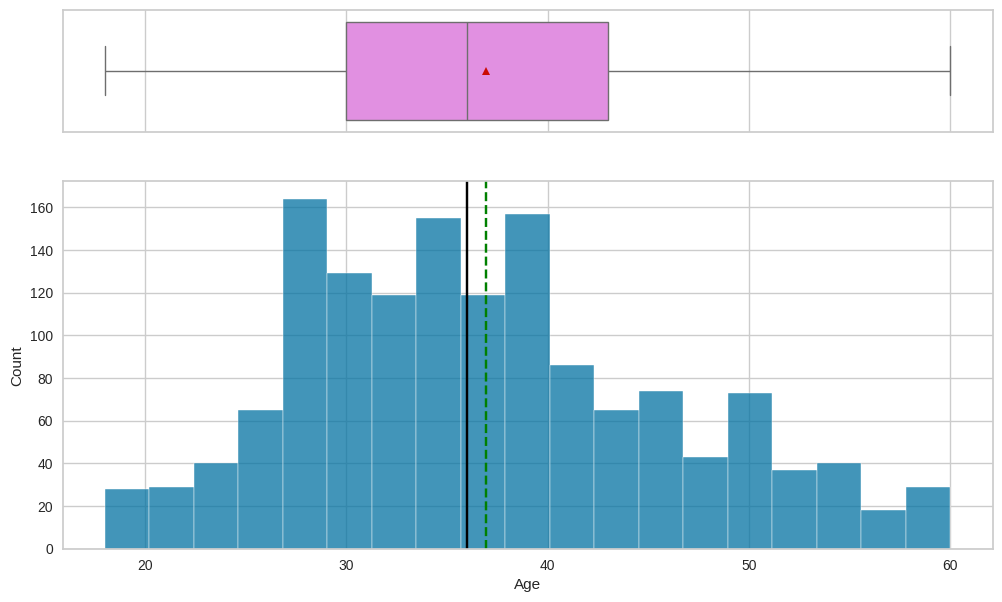

In [ ]:
#We plot a histogram and box plot for age
histogram_boxplot(data, 'Age')

1. Age has an almost normal distribution
2. Age has a median of approximately 36 years

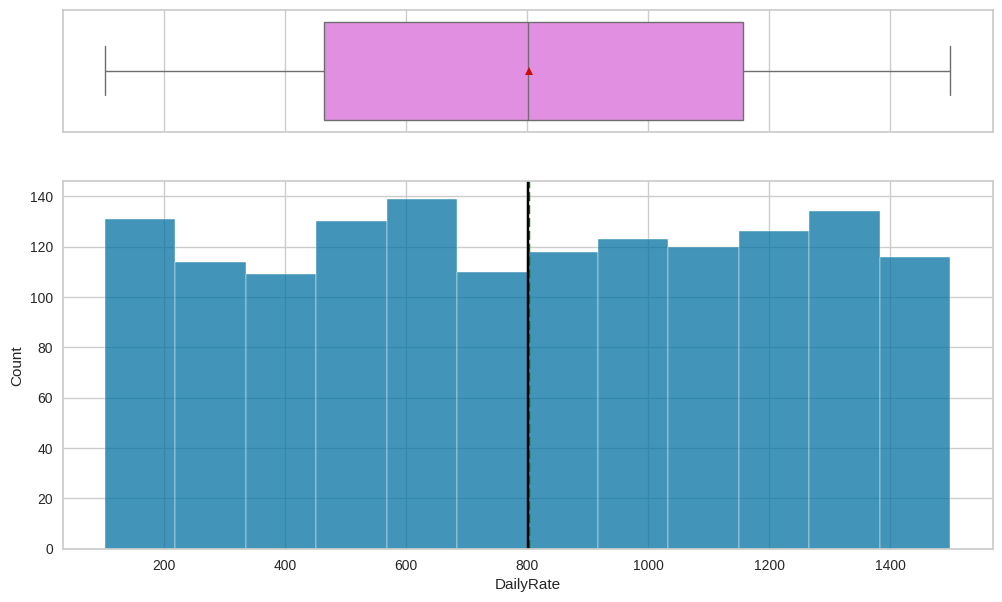

In [ ]:
##We plot a histogram and box plot for DailyRate
histogram_boxplot(data, 'DailyRate')

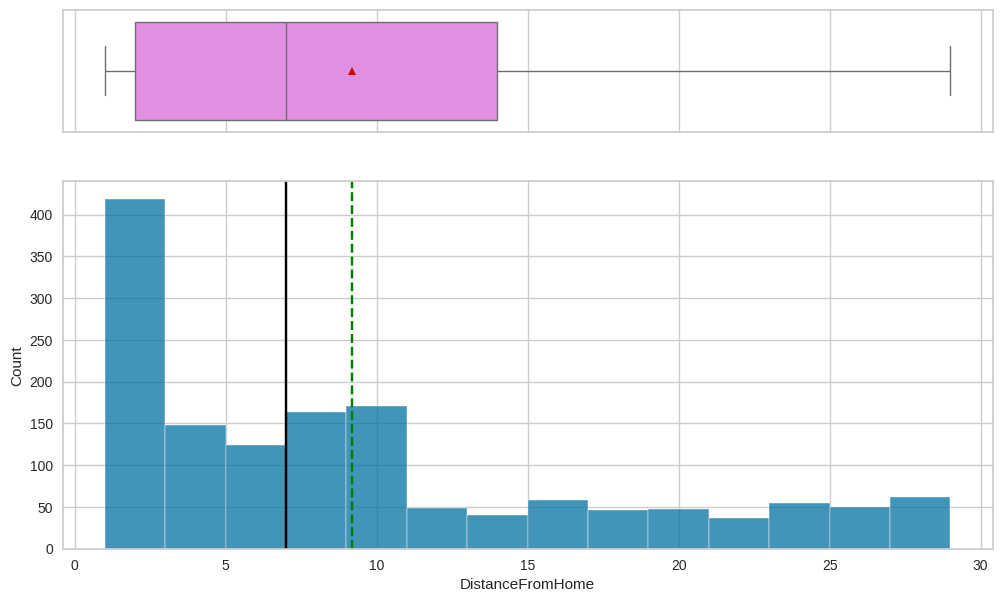

In [ ]:
###We plot a histogram and box plot for DistanceFromHome
histogram_boxplot(data, 'DistanceFromHome')

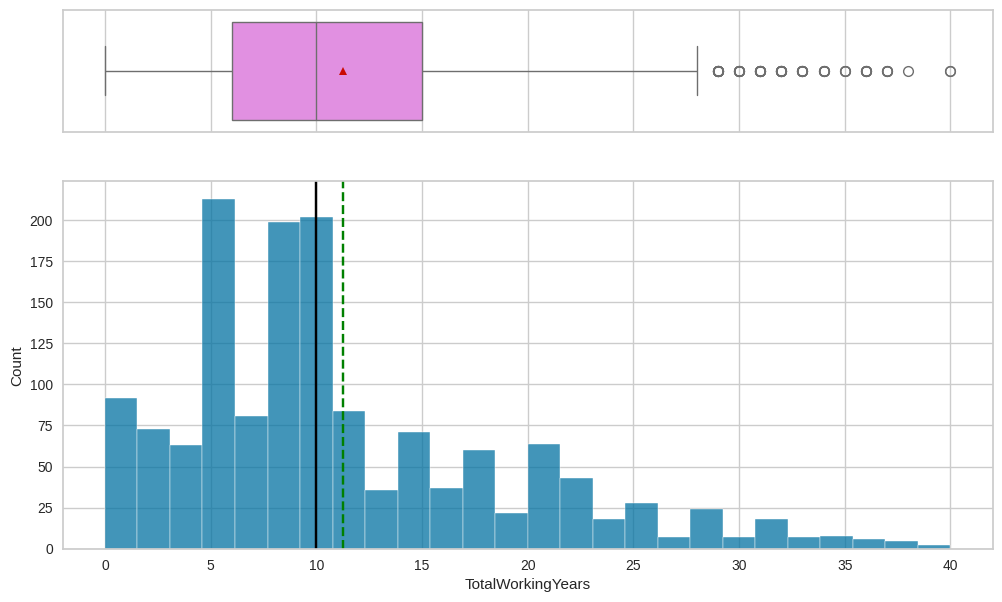

In [ ]:
#We plot Total Working Years
histogram_boxplot(data, 'TotalWorkingYears')

1. The Total Working years data is skewed on the right.
2. TotalWorkingYears has many outliers on the right sugesting there are employees who have worked for many years than normal

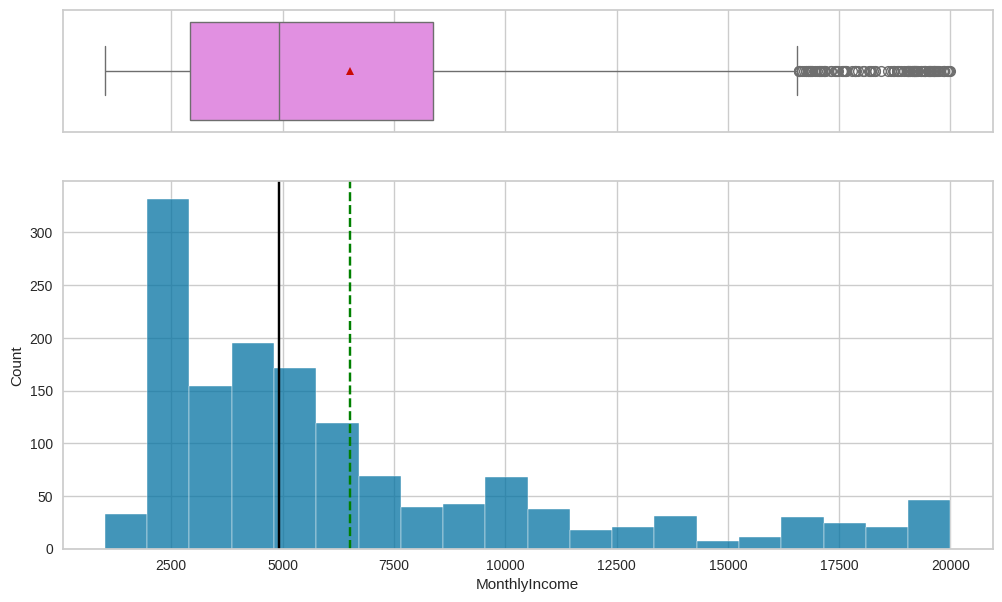

In [ ]:
#We plot Monthly Income
histogram_boxplot(data, 'MonthlyIncome')

1. The data is skewed on the left
2. There are many outliers on the left suggesting that there are many employees earning much more than the normal. These are the higher wage earners.

## Univariate for columns with Object data types

In [ ]:
# Create a function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

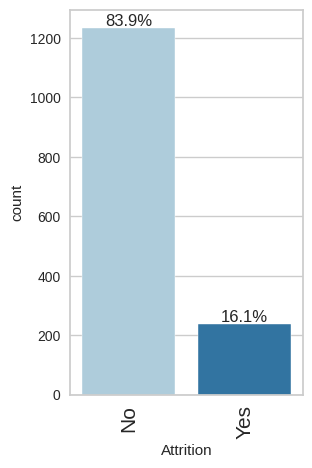

In [ ]:
#We plot Attrition
labeled_barplot(data, 'Attrition', perc=True)

1. Approximately 90% of employees don't suffer attrition

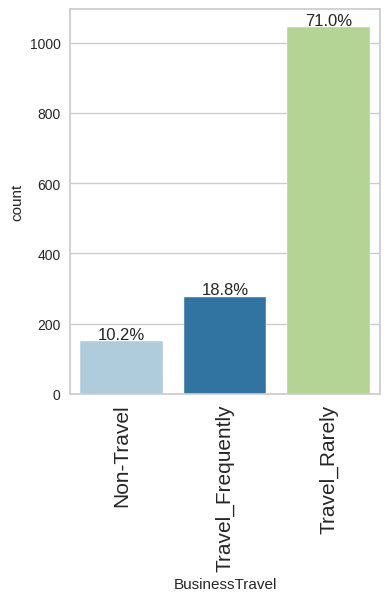

In [ ]:
#We plot Business Travel
labeled_barplot(data, 'BusinessTravel', perc=True)

1. 71% of the employees travel rarely
2. 18.8% of the employees travel frequently

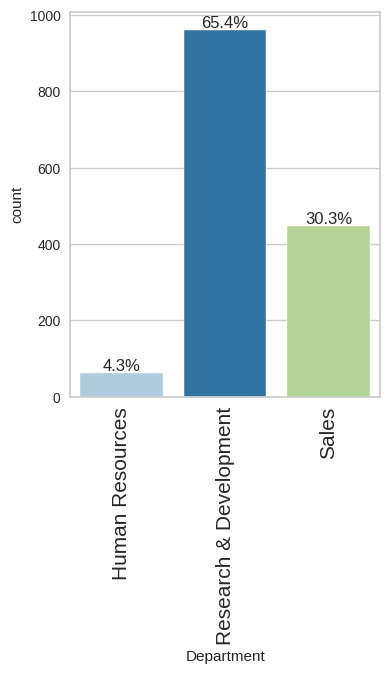

In [ ]:
#We plot Department
labeled_barplot(data, 'Department', perc=True)

1. Approximately 65% of the employees are in the Research and Development department.

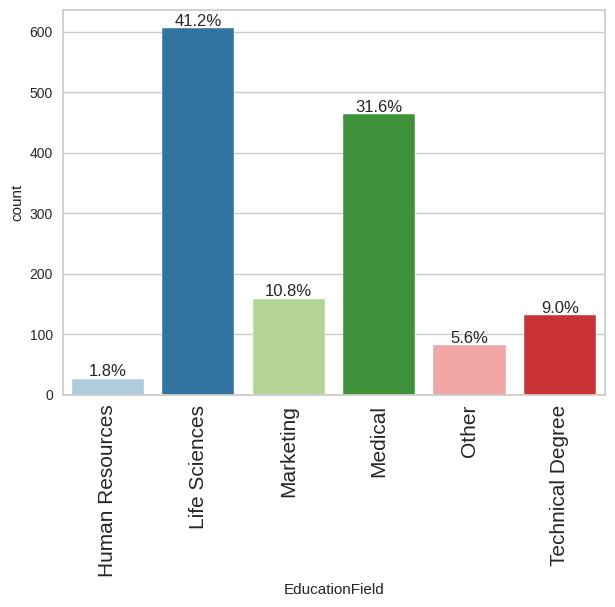

In [ ]:
#We plot Education Field
labeled_barplot(data, 'EducationField', perc=True)

1. 42.2% of the employees have studied life science
1. Those who have studied in the medical field constitute of 31.6%

In [ ]:
#define numerical columns to be used for Correlation analysis
#I have not included all the numerical columns, Please include all
num_cols = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction', 'MonthlyIncome','MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
data_cor = data[num_cols]

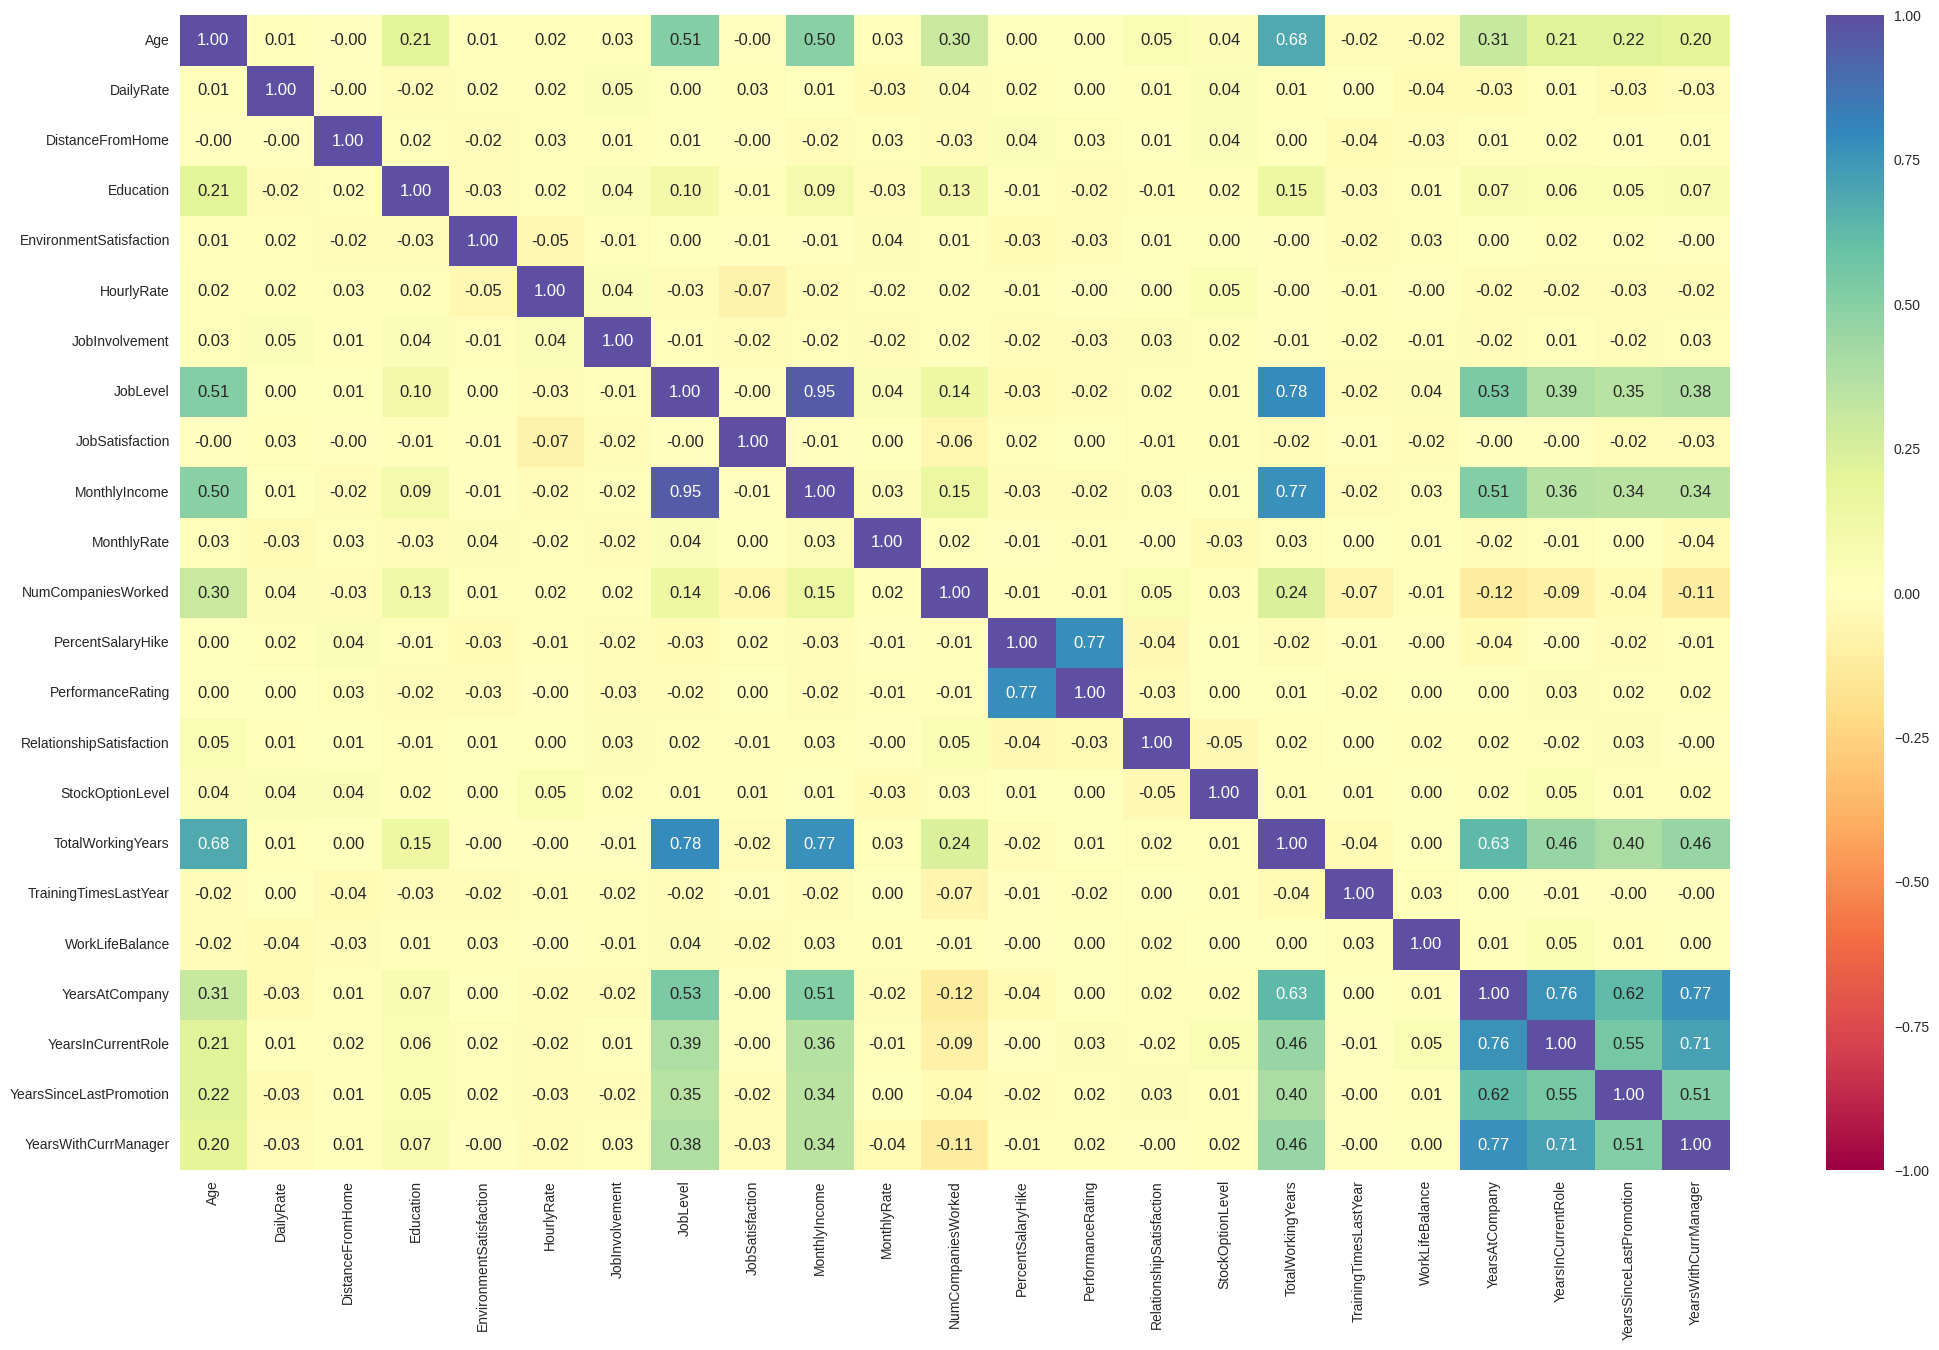

In [ ]:
# Conduct correlation Analysis to determine how variables are related
plt.figure(figsize=(25, 15))
sns.heatmap(
    data_cor.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Theres a very strong correlation between Job level and monthly income.

# Data Preprocessing
*   Duplicate value check
*   Missing value treatment
*   Outlier check
*   Feature engineering (if needed)
*   Any other preprocessing steps (if needed)


In [ ]:
#duplicate value check
data.duplicated().sum()

0

There are no duplicate values

In [ ]:
#Missing value check
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


None of the column has mising values. There is therefore no neeed for missing value treatment

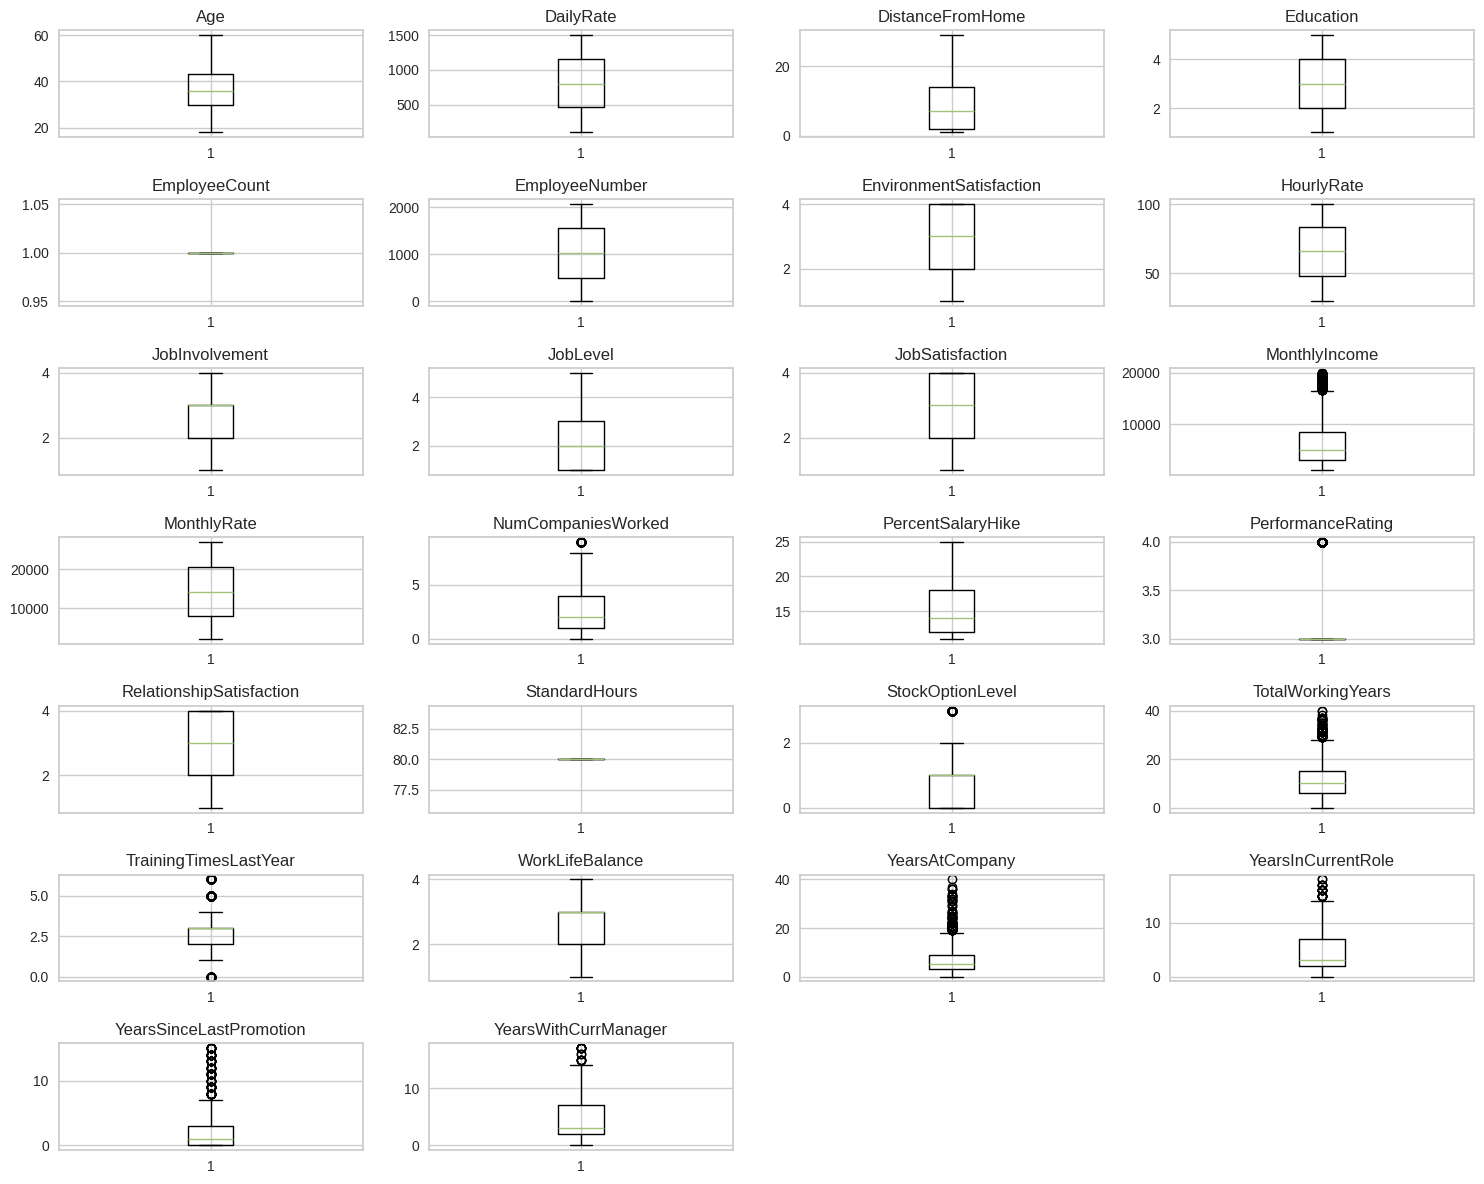

In [ ]:
#To show outliers we prepare Box plots for all numerical values
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows and columns for the subplot grid
num_rows = 7
num_cols = 4
num_plots = num_rows * num_cols  # Total number of plots

# Loop through numeric columns and create subplots
for i, variable in enumerate(numeric_columns):
    # Check if we need to create a new figure
    if i >= num_plots:
        plt.show()  # Show the current figure
        plt.figure(figsize=(15, 12))  # Create a new figure
        i = 0  # Reset the subplot index

    plt.subplot(num_rows, num_cols, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()  # Show the last figure

Totalworkinghours, Trainingtimeslastyear, Yearsatcompany, Yearsincurrentrole, YerasSinceLastPromotion and YearsWithCurrentmanager have outliers.

# Modelling

In [ ]:
#We make a copy of the data for modelling
data_model=data.copy()

In [ ]:
#  We define X by dropping PerformanceRating which we seek to predict with the model and y which is equal to the PerformanceRating column
X=data_model.drop(['PerformanceRating'],axis=1)
Y=data_model['PerformanceRating']

In [ ]:
# View data for X Dataframe
X.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,4,80,1,6,3,3,2,2,2,2


In [ ]:
#View data on the Y dataframe
Y.head()

,PerformanceRating
0,3
1,4
2,3
3,3
4,3


In [ ]:
#generate dummy variables for each categorical variable
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,)

In [ ]:
#split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
#confirm the split
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data_model.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data_model.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [ ]:
# Define a Function to compute different metrics to check classification model performance
def model_performance_classification_sklearn(model, predictors, target):


    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, pos_label=3)  # to compute Recall, set pos_label to match your target labels
    precision = precision_score(target, pred, pos_label=3)  # to compute Precision, set pos_label to match your target labels
    f1 = f1_score(target, pred, pos_label=3)  # to compute F1-score, set pos_label to match your target labels

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
          "Accuracy": acc,
           "Recall": recall,
           "Precision": precision,
           "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
#Define a function to compute confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building the Decision Tree Model

In [ ]:
#Buiding the Decision tree Model
dtree_estimator = DecisionTreeClassifier(criterion='gini', random_state=1, class_weight='balanced')
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [ ]:
#Show parameters used to generate the model
print(dtree_estimator)

DecisionTreeClassifier(class_weight='balanced', random_state=1)


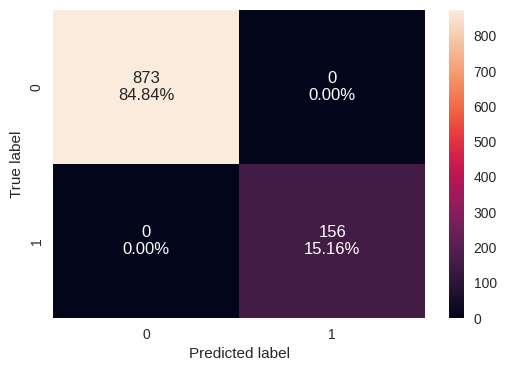

In [ ]:
#We check the performance of the model on the training set by creating the confusion matrix
confusion_matrix_sklearn(dtree_estimator, x_train, y_train)



In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(dtree_estimator, x_train, y_train)
print("Training performance for dtree_estimator model:")
decision_tree_perf_train

Training performance for dtree_estimator model:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
#Checking model performance on the test set
dtree_estimator_test_perf=model_performance_classification_sklearn(dtree_estimator, x_test, y_test)
print("Testing performance \n",dtree_estimator_test_perf)


Testing performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


Model performing well on the train and testing data.

## Building the ADABoost Model

In [ ]:
#Building the ADAboost Model
adaboost_estimator = AdaBoostClassifier(n_estimators=100, random_state=1)
adaboost_estimator.fit(x_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=1)

In [ ]:
#Show parameters used to fit the model
print(adaboost_estimator)

AdaBoostClassifier(n_estimators=100, random_state=1)


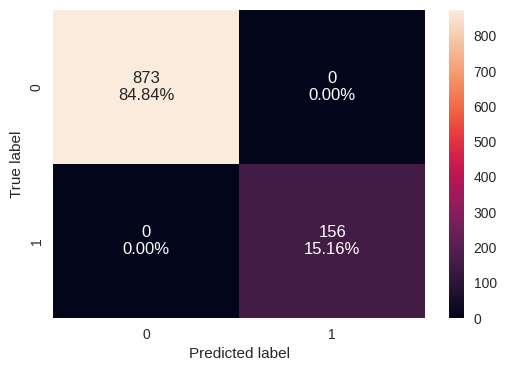

In [ ]:
#We check the performance of the model on the training set by creating the confusion matrix
confusion_matrix_sklearn(adaboost_estimator, x_train, y_train)

In [ ]:
#We check the performance of the model on the test set by creating the confusion matrix
adaboost_estimator_perf_test = model_performance_classification_sklearn(adaboost_estimator, x_test, y_test)
print("Training performance for adaboost_estimator model:")
adaboost_estimator_perf_test

Training performance for adaboost_estimator model:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


The model performs very well on both the Training and the testing data. It is not overfit and is able to predict reliably.

# Fitting Models using Lazydirect

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 31/31 [00:02<00:00, 12.19it/s]

[LightGBM] [Info] Number of positive: 156, number of negative: 873
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1363
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151603 -> initscore=-1.722080
[LightGBM] [Info] Start training from score -1.722080
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [ ]:
#Print the models
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                1.000              1.000    1.000     1.000   
BaggingClassifier                 1.000              1.000    1.000     1.000   
RandomForestClassifier            1.000              1.000    1.000     1.000   
PassiveAggressiveClassifier       1.000              1.000    1.000     1.000   
LGBMClassifier                    1.000              1.000    1.000     1.000   
DecisionTreeClassifier            1.000              1.000    1.000     1.000   
LinearSVC                         0.993              0.996    0.996     0.993   
LinearDiscriminantAnalysis        0.989              0.993    0.993     0.989   
Perceptron                        0.993              0.984    0.984     0.993   
CalibratedClassifierCV            0.993              0.984    0.984     0.993   
SGDClassifier               